In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
os.listdir("C:\\Users\\Eren\\Desktop\\notlar\\lesson notes\\dönem 5\\AIN311\\project")

['dataset', 'ipynb_files', 'proposal taslak.docx', 'proposal_son.docx']

In [3]:
base_dataset_path = r"C:\Users\Eren\Desktop\notlar\lesson notes\dönem 5\AIN311\project\dataset\garbage_classification_dataset"
os.chdir(base_dataset_path)
classes = os.listdir()

In [4]:
classes

['battery',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

In [55]:
class_len = {}
total = 0
for cls in classes: 
    class_len[cls] = len(os.listdir(base_dataset_path + os.sep + cls))
    total += class_len[cls]
print(total)

11516


Text(0, 0.5, 'Number of Images')

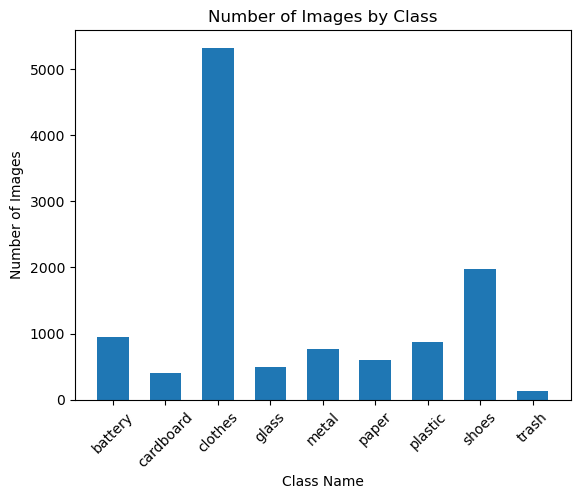

In [56]:
plt.bar(class_len.keys(), class_len.values(), width = 0.6)
plt.xticks(rotation=45)  
plt.title("Number of Images by Class")
plt.xlabel('Class Name')
plt.ylabel('Number of Images')

In [8]:
def get_dims(file):
    im = Image.open(file)
    return im.size

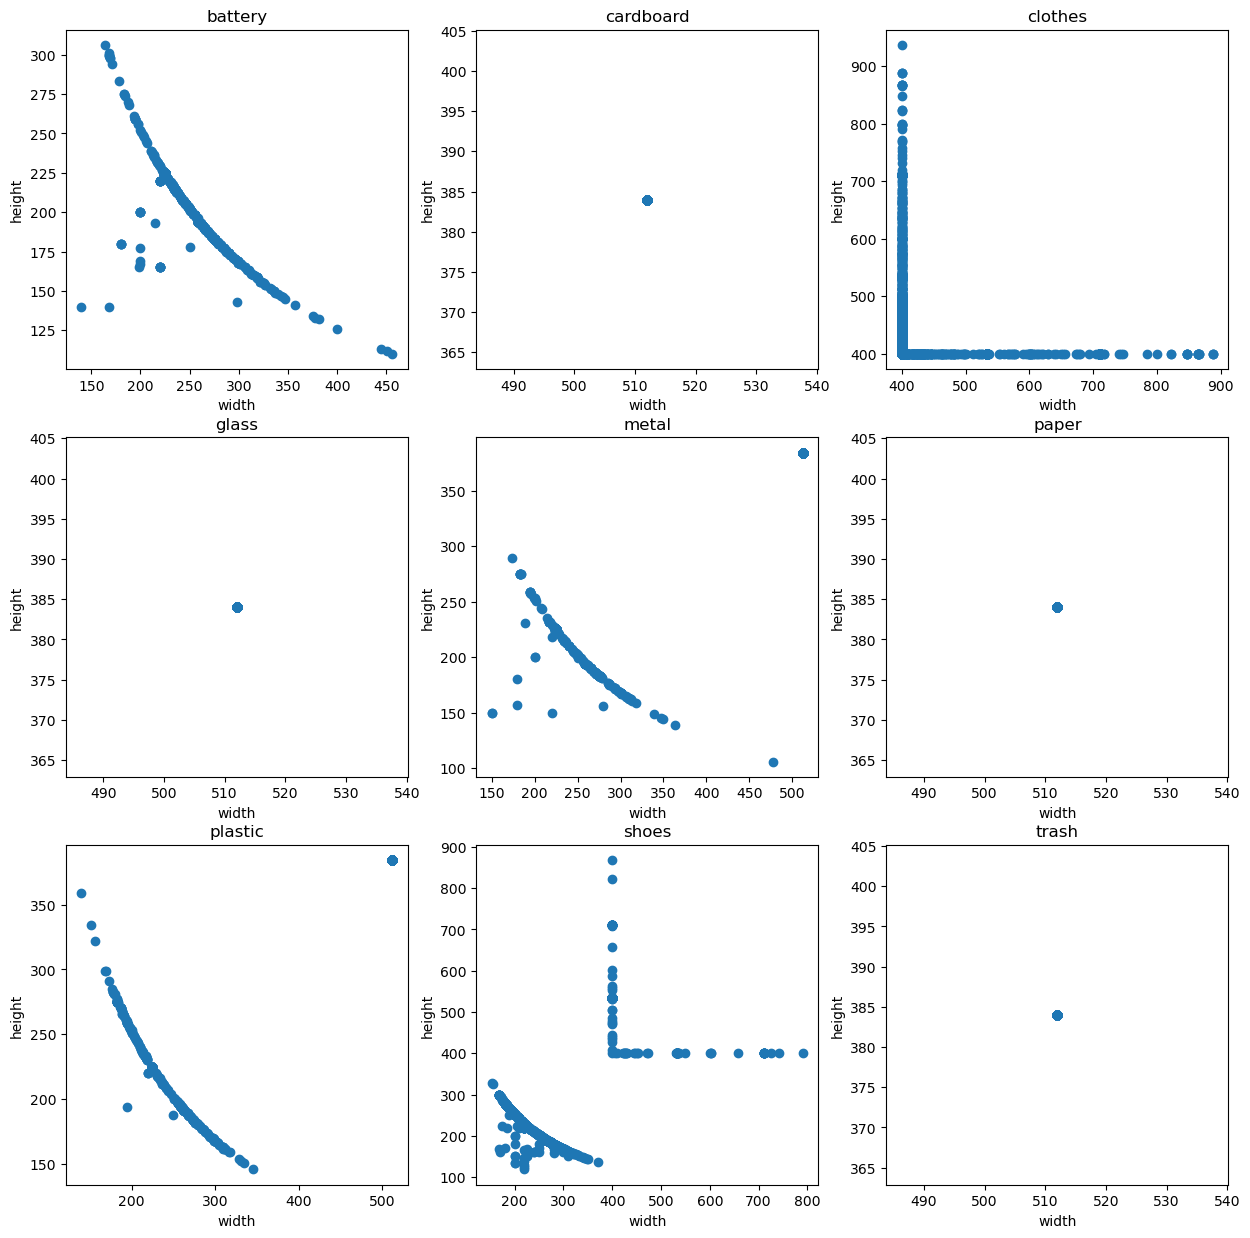

In [40]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))

i=0
j=0

for cls,number in class_len.items():
    classpath = base_dataset_path + os.sep + cls
    files = [classpath + os.sep + f for f in os.listdir(classpath)]
    
    dimensions = []

    for file in files:
        w,h = get_dims(file)
        dimensions.append((w,h))
    
    dim_df = pd.DataFrame(dimensions, columns=['width', 'height'])
    axs[i,j].scatter(dim_df["width"], dim_df["height"])
    axs[i,j].set_title(cls)
    axs[i,j].set(xlabel="width", ylabel="height")
    
    j += 1
    
    if j==3:
        j = 0
        i += 1
    

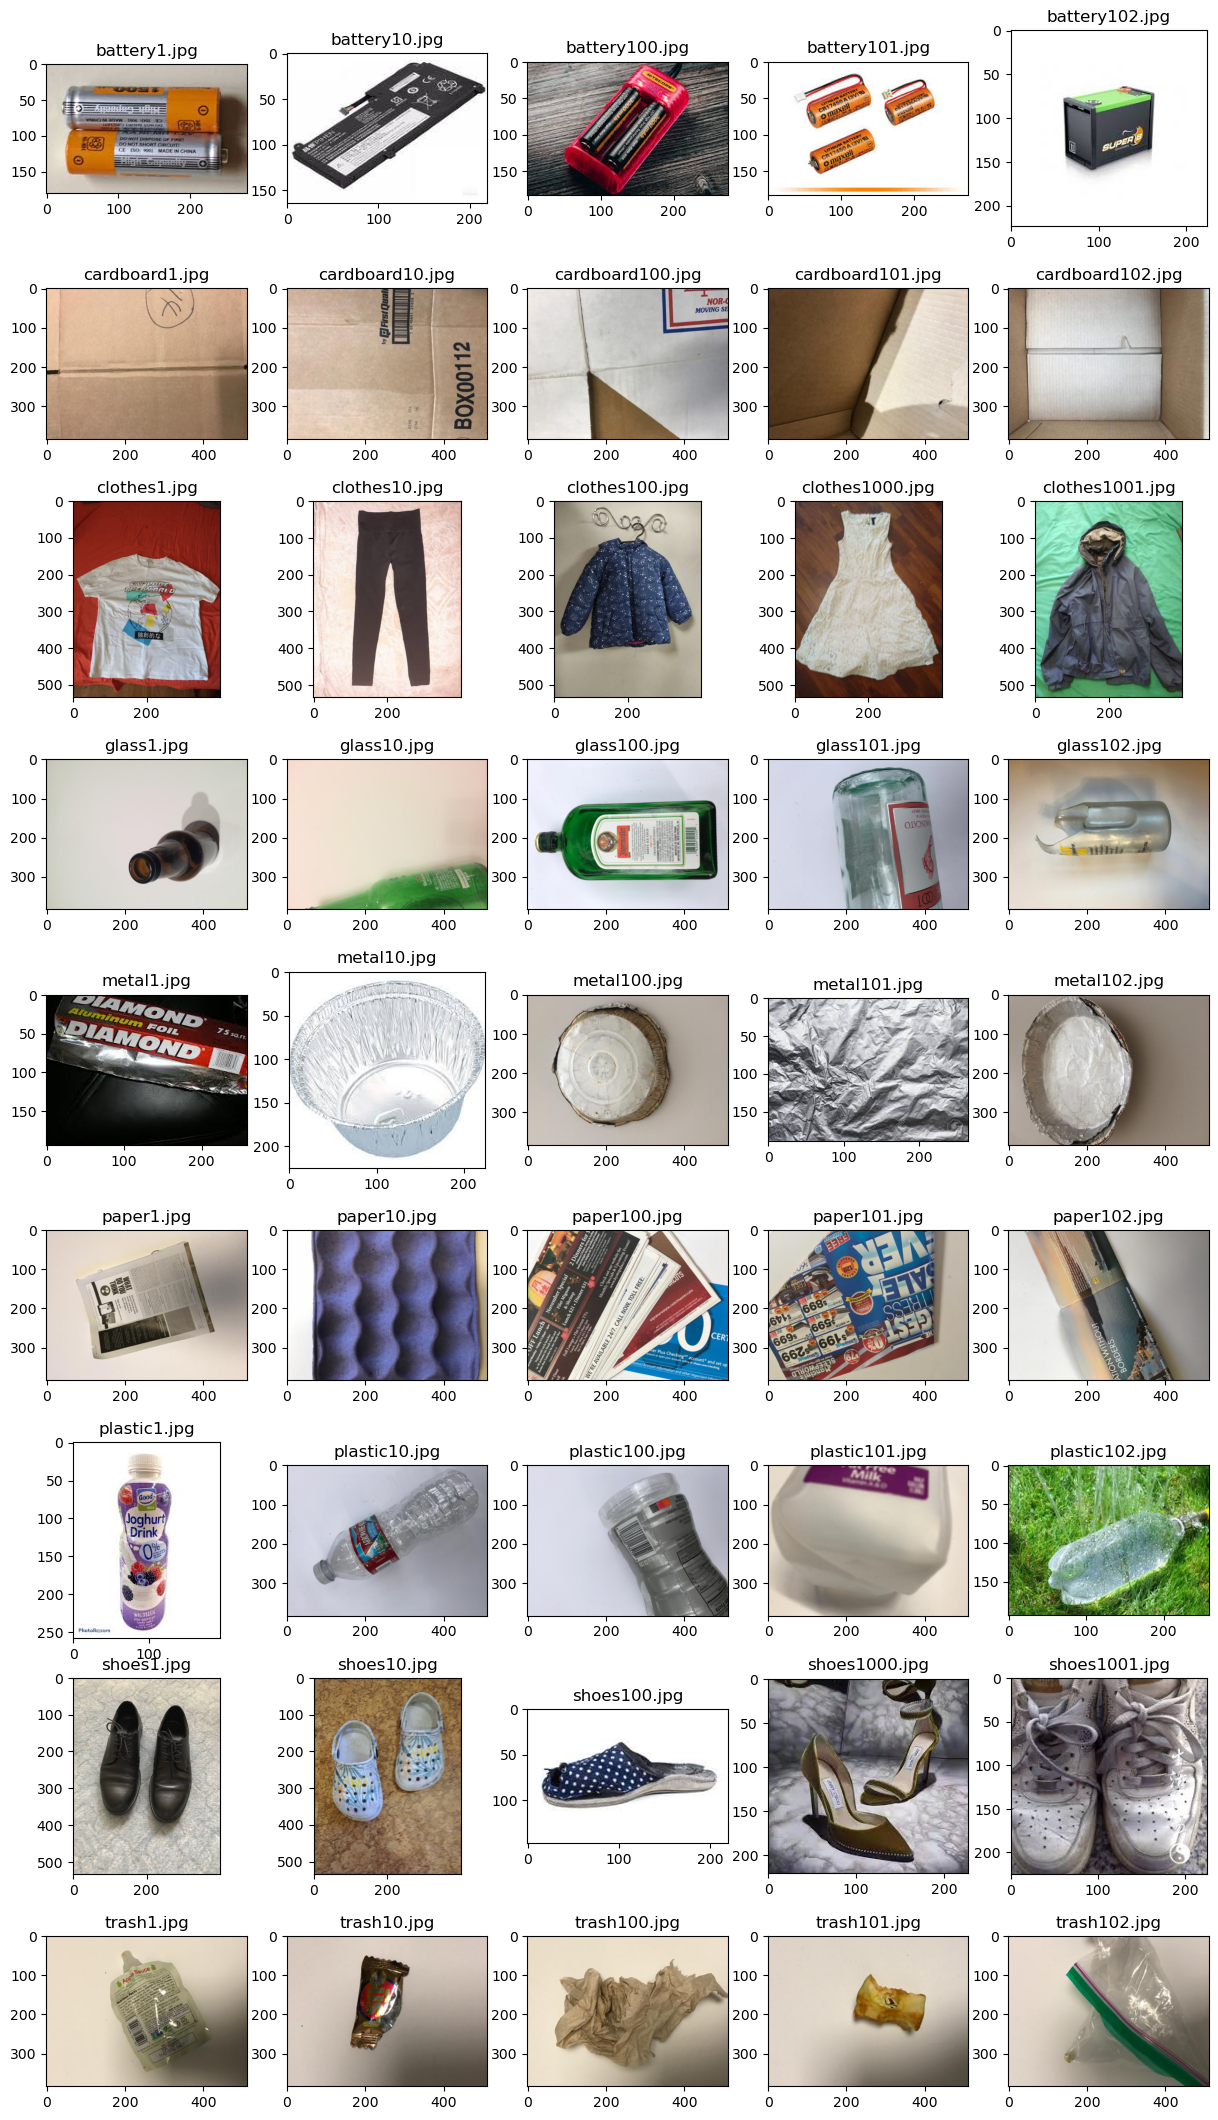

In [54]:
fig, axs = plt.subplots(9, 5, figsize=(15,27))

i = 0
for cls,number in class_len.items():
    classpath = base_dataset_path + os.sep + cls
    for j in range(5):
        file = classpath + os.sep + os.listdir(classpath)[j]        
        image = Image.open(file)
        axs[i,j].imshow(image) 
        axs[i,j].set_title(os.listdir(classpath)[j])
    
    i += 1
    
plt.show()